In [26]:
from src.PCA import run_PCA, loss, FairPCA, frank_wolfe_NSW, factors
from src.data_utils import parse_VCF, load_1KG_genotype, load_1KG_annotations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
train_data = load_1KG_genotype("data/1000Genomes/recoded_1000G.noadmixed.mat")
train_data = scale(train_data)

In [13]:
train_labels = load_1KG_annotations("data/1000Genomes/recoded_1000G.raw.noadmixed.lbls_super")

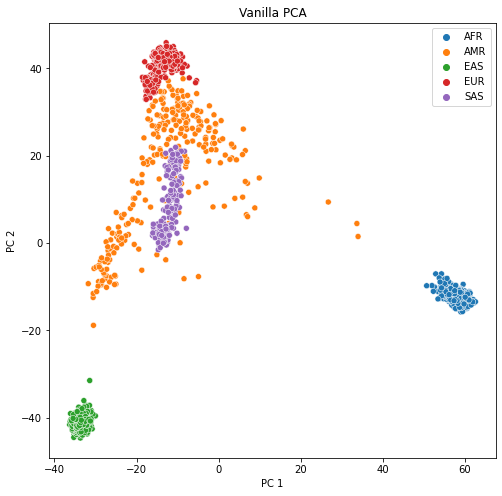

CPU times: user 6.2 s, sys: 1.11 s, total: 7.31 s
Wall time: 4.49 s


In [25]:
%%time

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
pca = PCA(n_components=2)
pca.fit(train_data)
p_components = pca.components_.T

projected = train_data @ p_components
reconstruction_loss = loss(train_data,p_components)

a,b = np.split(projected,2,1)
a = a.ravel()
b = b.ravel()

sns.scatterplot(x=a,y=b,hue=train_labels,ax=ax)
plt.ylabel('PC 2')
plt.xlabel('PC 1')
plt.title('Vanilla PCA')
plt.show()